<a href="https://colab.research.google.com/github/OH1107/statistics/blob/master/training/4%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EA%B8%B0%EC%B4%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석을 위한 데이터 준비

In [1]:
from google.colab import drive

ROOT = "/content/drive"  
drive.mount(ROOT)

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/statistics/data

/content/drive/My Drive/Colab Notebooks/statistics/data


In [3]:
%ls

'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


## 데이터 전처리

### 데이터 호출하기

In [4]:
import pandas as pd
df = pd.read_csv('Ashopping.csv',sep=',',encoding='cp949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### 무작위 표본 추출

In [5]:
data_temp=df.sample(n=10, replace=False, random_state=123)
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,5,5,1,3,1052,0,3,6,7,4,5,5,3,4,6,7,6,6.0,6.0,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,7,7,1,4,1085,0,7,7,7,6,7,7,6,7,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,5,5,0,3,946,1,6,6,6,2,3,4,6,3,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,7,7,1,7,1083,0,3,7,7,5,7,7,6,7,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,5,5,1,5,1090,0,6,6,7,5,6,7,6,6,7,6,5,6.0,6.0,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,7,7,1,9,1089,0,5,5,7,3,7,6,5,6,6,5,6,6.0,6.0,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,5,5,1,9,938,0,7,7,6,3,4,5,7,7,5,5,6,7.0,6.0,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,5,5,1,1,1051,0,4,5,7,5,5,6,6,5,5,6,6,5.0,5.0,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,2,2,1,3,679,0,5,5,6,3,4,5,5,6,7,5,6,7.0,6.0,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,5,5,1,5,927,0,3,4,5,3,2,5,4,5,5,4,5,4.0,5.0,7,7,6,7,6,5,4,5,5,5


### 조건을 만족하는 레코드 추출

In [7]:
churn_customer=df[df.이탈여부==1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,6,6,1,5,615,0,2,6,2,2,6,4,4,4,5,6,6,6.0,NaN,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,6,6,1,8,693,0,5,6,2,3,1,4,5,6,6,5,7,NaN,NaN,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,4,4,1,3,528,0,5,6,1,2,5,4,5,6,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,3,3,1,3,549,0,4,7,2,2,6,3,4,6,5,7,6,6.0,7.0,6,7,6,6,7,5,7,6,6,6


### 특정 필드 추출

In [9]:
df_1=df[['고객ID','방문빈도']]
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


### 데이터 분할

In [10]:
Under_500 = df[df.고객ID<=500]
Upper_500 = df[df.고객ID>500]
Under_500.tail()
Upper_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
999,1000,0,3182880,23,138386,19,367045,1,4,0,5,5,1,8,1072,0,4,5,7,4,3,5,4,6,6,5,6,7.0,7.0,7,7,6,7,6,5,6,7,6,6


### 데이터 추가

In [11]:
df_join=Under_500.append(Upper_500, ignore_index=True)
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### 데이터 병합

In [12]:
df_1=df[['고객ID','방문빈도']]
df_2=df[['고객ID','총_매출액']]

df_merge=df_1.merge(df_2)

df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


## 파생변수 생성

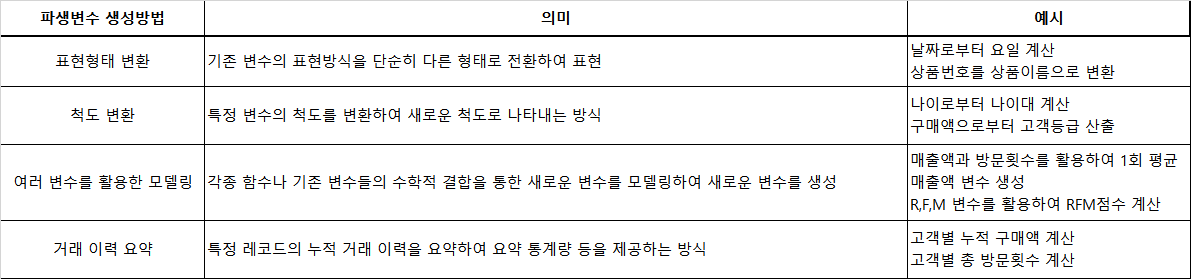

### 표현형태 변환

In [13]:
import numpy as np

df['남녀']=np.where(df.성별 == 0, '남자','여자')
df[['고객ID','성별','남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


## 척도 변환